This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

$
\newcommand{\dd}{\text{d}}
\newcommand{\e}{\operatorname{e}}
\newcommand{\Fc}{\underline F}
\newcommand{\Hc}{\underline H}
\newcommand{\Xc}{\underline X}
\newcommand{\Yc}{\underline Y}
\newcommand{\Zc}{\underline Z}
\newcommand{\xic}{\underline \xi}
\newcommand{\vc}{\underline v}
\newcommand{\pc}{\underline p}
\newcommand{\xiv}{\pmb{\xi}}
\newcommand{\Psiv}{\pmb{\Psi}}
\newcommand{\xivc}{\underline \xiv}
\newcommand{\xv}{\mathbf{x}}
\newcommand{\jj}{\operatorname{j}}
$

# 8 Transmission over Plate Junctions
## 8.1 Two Plates with different thickness
(sketch two plates with forces and velocities)

* wave transmission over any interface or junction can be studied in terms of the transmission coefficient
\begin{equation}\label{eq:tau}
\tau = \frac{P_T}{P_I}
\end{equation}
where $P_T$ is the power transmitted and $P_I$ is the incident power
* power in a wave
\begin{equation}\label{eq:power}
P = \frac12\Re(\vc^*\Fc) = \frac12\Re(\vc^*\Zc\vc)
\end{equation}
where $\vc$ and $\Zc$ can also be vector and matrix, respectively

#### L-Waves
* junction of two plates in the same plane
* plane L-waves with wave front parallel to junction (perpendicular incidence)
* three waves:
  * incident wave on plate 1
  * reflected wave on plate 1
  * transmitted wave on plate 2
* impedance is similar to beam:
\begin{equation}\label{eq:ZLi}
Z_{LI}=m'' c_{LI}
\end{equation}
* junction at $x=0$:
\begin{gather}
\vc_1=\vc_{1+}\e^{-\jj k_{L1} x} + \vc_{1-}\e^{\jj k_{L1} x}\\
\vc_2=\vc_{2+}\e^{-\jj k_{L2} x}\\
\Fc_1 = - \left(\Zc_{LI1}\vc_{1+}\e^{-\jj k_{L1} x} - \Zc_{LI1} \vc_{1-}\e^{\jj k_{L1} x}\right)\\
\Fc_2= \Zc_{LI2}\vc_{2+}\e^{-\jj k_{L2} x}
\end{gather}
* at junction:
  * velocities of all members are equal ($\vc_1(0)=\vc_2(0)$)
  * sum of all forces must be zero

In [1]:
import sympy as sy
ZL1, ZL2 = sy.symbols('Z_LI1 Z_LI2',positive=True) 
v11, v12, v21 = sy.symbols('v_1+ v_1- v_2+')
# v, F at the junction x=0
v1 = v11 + v12
F1 = -ZL1*v11 + ZL1*v12
v2 = v21
F2 = ZL2*v21
# system of two equations, solve for unkown amplitude
# transmitted and reflected waves
sd = sy.solve([sy.Eq(v1,v2),sy.Eq(F1+F2,0)],v21,v12,dict=True)
# amplitude of transmitted wave = ampl. at junction
v = sd[0][v21]
display(v)
# transmitted and incident power
PT = 1/2 * sy.re(v * ZL2 * sy.conjugate(v)) 
PI = 1/2 * sy.re(v11 * ZL1 * sy.conjugate(v11)) 
# transmission coefficient
tau = sy.simplify(PT/PI)
display(tau)

2*Z_LI1*v_1+/(Z_LI1 + Z_LI2)

4.0*Z_LI1*Z_LI2/(Z_LI1 + Z_LI2)**2

* the transmission coefficient depends on the impedances
* sound reduction index
\begin{equation}\label{eq:R}
R = 10 \lg \frac{1}{\tau}\;\text{dB}
\end{equation}
* plot for different properties (ratio of thicknesses, ratio of wave speeds, ratio of densities) of both plates

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import ipywidgets as ipw
%matplotlib inline

tau_ = sy.lambdify([ZL1,ZL2],tau)

@ipw.interact(cL_2=(0.1,10),rho_2=(0.1,10))
def plot_RL(cL_2=1.0,rho_2=1.0):
    h2 = np.logspace(-1,1,20)
    ZL2_ = cL_2 * rho_2 * h2
    pl.semilogx(h2,-10*np.log10(tau_(1,ZL2_)))
    pl.xlabel(r'$\frac{h_2}{h_1}$')
    pl.ylabel('R/dB')


interactive(children=(FloatSlider(value=1.0, description='cL_2', max=10.0, min=0.1), FloatSlider(value=1.0, de…

* similar approach can be used for other wave types
* will become very complicated for junctions with more than on wave type
* alternative approach to calculate $\tau$:
  1. use member-local coordinate system
  2. get impedances for all members
  3. use transform the coordinates to junction coordinates (global)
  4. combine all impedances and velocities at plate edge of all members of the junction
  5. find blocked forces / tractions acting on the junction through incident wave 
  6. compute velocities at junction
  7. compute transmitted / reflected powers and transmission coefficients

* for the L-wave this is extremely simple:
  1. coordinate system: x>0
  2. $Z_{LIi}$
  3. only two possibilities: coordinate transform $K_i=1$ or $K_i=-1$, applied to both $Z$ and $\vc$
  4. $ \sum_i K_i Z_{LIi} K_i$
  5. $\Fc_j = -2 Z_{LIj} \vc_{j+}$ where the member $j$ carries the incident wave
  6. solve $\left(\sum_i K_i Z_{LIi} K_i\right)\vc=K_i F_j$
  7. use \eqref{eq:power}

In [3]:
# we start with step 4
K1 = -1
K2 = 1
Zcomb = K1*ZL1*K1 + K2*ZL2*K2 # in this specific case, K has no effect 
Fj = -2*ZL1*v11
v = sy.symbols("v")
v_ = sy.solve(sy.Eq(Zcomb*v,K1*Fj),v)[0]
display(v_)
# transmitted and incident power
PT = 1/2 * sy.re(v_ * ZL2 * sy.conjugate(v_)) 
PI = 1/2 * sy.re(v11 * ZL1 * sy.conjugate(v11)) 
# transmission coefficient
tau_ = sy.simplify(PT/PI)
display(tau_)

2*Z_LI1*v_1+/(Z_LI1 + Z_LI2)

4.0*Z_LI1*Z_LI2/(Z_LI1 + Z_LI2)**2

* this is obviously the same result as above
* now we can easily find the result in case of three or more plates (for the simple L-wave case this is not very realistic!)

(sketch with three plates, two of them parallel)

* example for three plates

In [4]:
ZL3 = sy.symbols('Z_LI3',positive=True) 
K3 = 1
Zcomb = K1*ZL1*K1 + K2*ZL2*K2 + K3*ZL3*K3
v_ = sy.solve(sy.Eq(Zcomb*v,K1 * Fj),v)[0]
display(v_)
# transmitted and incident power
PT = 1/2 * sy.re(v_ * ZL2 * sy.conjugate(v_)) 
PI = 1/2 * sy.re(v11 * ZL1 * sy.conjugate(v11)) 
# transmission coefficient
tau_ = sy.simplify(PT/PI)
display(tau_)

2*Z_LI1*v_1+/(Z_LI1 + Z_LI2 + Z_LI3)

4.0*Z_LI1*Z_LI2/(Z_LI1 + Z_LI2 + Z_LI3)**2

#### Bending Waves 
(sketch with multiple plates and different connecting angles )

* step 1-7 can also be used here as follows (details are omitted because of the complicated expressions)
  1. local coordinate system (same as for L-Waves)
  2. as bending waves need $v_y$ and $w_z$ velocities and $F_y$ and $M_z$ forces / moments, the impedance is now a (2x2) matrix $\mathbf{\Zc_B}$
  3. as the angle $\vartheta$ between the global plane and the individual plate  is arbitrary, the coordinate transformation $\mathbf{K}$ is now also a matrix, connecting local $v_y$ and $w_z$ to global $v_x$, $v_y$ and $w_z$, depending on $\vartheta$
  4. $\sum_i \mathbf{K_i \Zc_{Bi}K_i^T}$
  5. $\mathbf{F_j}=\mathbf{\Zc_{BFj}}\vc_{j+}$ where $\mathbf{\Zc_{BFj}}$ is a (2x1) vector giving both blocked force and moment at the junction
  6. solve $\left(\sum_i \mathbf{K_i \Zc_{Bi}K_i^T}\right)\mathbf{\vc}=\mathbf{K_j F_j}$
  7. use \eqref{eq:power}
  
* to demonstrate this, we use the special python package `transmission` implementing this unified approach with high-level object-oriented control
* two plate example, as before
* first, we define the properties of the member plates (we use typical values for steel)

In [5]:
from transmission import *
# define material
mat1 = ElasticMaterial(dens=7800.,elas=2.1e11,poisson=0.3)
# define plate section properties for isotropic plate 1
sec1 = IsoPlateSec(mat=mat1,thick=2e-3)
# bending stiffness
print("B'=",sec1.B1())
# wave number at 500 Hz
print("kB=",sec1.kb4(2*np.pi*500)**0.25)

B'= 153.84615384615387
kB= 31.62892453951373


* now we define the plate members and their orientation

In [6]:
# same for plate 2 (same material, but different thickness)
sec2 = IsoPlateSec(mat=mat1,thick=1e-3)
# define the connection of the plates
# two plates
pl01 = InfPlate(sec=sec1,theta=180)
pl02 = InfPlate(sec=sec2,theta=0)

* finally we define the connection and compute $\tau$

In [7]:
# connection
conn = ContLineConnect()
conn.add_member(pl01)
conn.add_member(pl02)
# calculate transmission for a single frequency
fr = 500
om = 2*np.pi*fr 
conn.get_trans(fr,pl01,2,pl02) # workaraound for bug in transmission :-(
k = np.array((1e-5,))*sec1.kb4(om)**0.25 # wave number along junction, 
                                         # see text below    
tau = conn.calck(om,k,pl01,2) # compute transmission coefficients
print(tau[pl02][2])

[0.93585115]


* it is possible to do a parametric study and plot the sound reduction index as function of the thickness ratio (as shown above for L-waves)

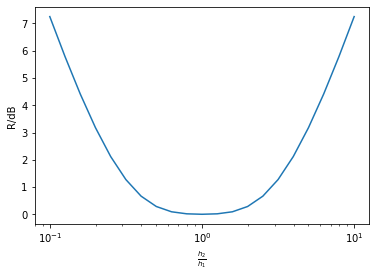

In [8]:
@np.vectorize
def tau_B(h2):
    sec2.thick = h2*sec1.thick
    tau = conn.calck(om,k,pl01,2)
    return tau[pl02][2][0]

h2 = np.logspace(-1,1,21)
pl.semilogx(h2,-10*np.log10(tau_B(h2)))
pl.xlabel(r'$\frac{h_2}{h_1}$')
pl.ylabel('R/dB')
#reset the thickness for further use
sec2.thick = sec1.thick

## 8.2 Arbitrary Junctions

* we can also handle arbitrary angles $\theta$ for the orientation  the plates
* transfer of energy may occur from one wave type to another (e.g. bending waves to L-waves)

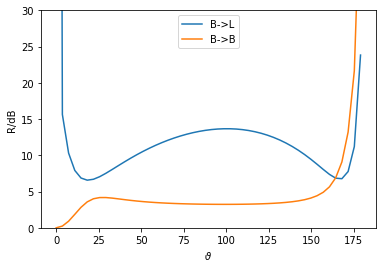

In [9]:
@np.vectorize
def tau_B2(theta):#
    pl02.theta = theta
    tau = conn.calck(om,k,pl01,2)
    return (tau[pl02][0][0],tau[pl02][2][0])

theta = np.linspace(0,179,50)
pl.plot(theta,-10*np.log10(tau_B2(theta)[0]),label="B->L")
pl.plot(theta,-10*np.log10(tau_B2(theta)[1]),label="B->B")
pl.legend()
pl.xlabel(r'$\vartheta$')
pl.ylabel('R/dB')
pl.ylim(0,30);

(sketch with angle of incidence)

* so far we had only perpendicular incidence
* any other angles will result in periodicity along junction (wave impedances !)
* the dependency an the angle of incidence $\phi$ can be very complicated

/home/sarradj/sarradj/lehre/Koerperschall/skript_KS/transmission/transmission.py:890: LinAlgWarning: Ill-conditioned matrix (rcond=4.35531e-30): result may not be accurate.
  vg[:,n] = solve(M[:,:,n],N[:,n])
/home/sarradj/sarradj/lehre/Koerperschall/skript_KS/transmission/transmission.py:929: RuntimeWarning: invalid value encountered in true_divide
  tau[x2]=0.5*(pout/pin)


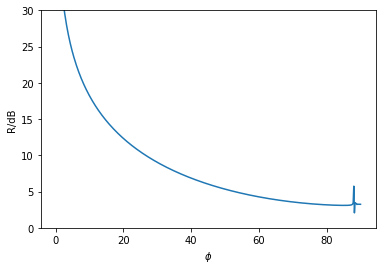

In [10]:
pl02.theta = 90
sec2.thick = 2e-3
phi = np.linspace(0,np.pi/2,500)
kk = np.cos(phi)*sec1.kb4(om)**0.25
tau = conn.calck(om,kk,pl01,2)
theta = np.linspace(0,179,51)
pl.plot(180*phi/np.pi,-10*np.log10(tau[pl02][2]))
pl.xlabel(r'$\phi$')
pl.ylabel('R/dB')
pl.ylim(0,30);

* note the pole near 87° 
* often we are interested in a diffuse incidence (with same probability from every angle)
* integration is necessary:
\begin{equation}\label{eq:diffuse}
\overline\tau = \int_0^{\pi/2}\tau(\varphi)sin(\varphi)d\varphi=\int_0^1 \tau(k_z)d \frac{k_z}{k_B}
\end{equation}
* example of connection between two different plates:
![trex1.png](trex1.png)

In [11]:
mat1=ElasticMaterial(dens=8000.,elas=2e11,poisson=0.3)
sec1=IsoPlateSec(mat=mat1,thick=2e-3)
mat2=ElasticMaterial(dens=5000.,elas=1e11,poisson=0.25)
sec2=IsoPlateSec(mat=mat2,thick=1e-3)
node=CNode() # default coordinates: (0,0)
pl01=InfPlate(sec=sec1,theta=180)
pl02=InfPlate(sec=sec2,theta=90)
conn=ContLineConnect()
conn.add_member(pl01)
conn.add_member(pl02)
# calculate transmission for a single frequency
fr=500
# print result table
wavetypes=("L","T","B")
for x1 in range(2):
    for wt in range(3):
        for x2 in range(2):
            frpl=conn.members[x1] # source member
            topl=conn.members[x2] # receiver member
            tau=conn.get_trans(fr,frpl,wt,topl)
            print(x1+1,wavetypes[wt],"->",x2+1,wavetypes,":",\
                    array2string(-10*log10(tau),precision=2),"dB")

1 L -> 1 ('L', 'T', 'B') : [ 3.14  4.95 33.28] dB
1 L -> 2 ('L', 'T', 'B') : [11.43  9.52 19.76] dB
1 T -> 1 ('L', 'T', 'B') : [ 7.22  3.44 28.11] dB
1 T -> 2 ('L', 'T', 'B') : [11.52  5.57 20.65] dB
1 B -> 1 ('L', 'T', 'B') : [50.59 43.13  0.54] dB
1 B -> 2 ('L', 'T', 'B') : [26.88 24.87  9.52] dB
2 L -> 1 ('L', 'T', 'B') : [11.98  9.79 10.13] dB
2 L -> 2 ('L', 'T', 'B') : [ 1.59 14.7  21.17] dB
2 T -> 1 ('L', 'T', 'B') : [12.19  5.97 10.25] dB
2 T -> 2 ('L', 'T', 'B') : [16.84  2.49 20.56] dB
2 B -> 1 ('L', 'T', 'B') : [38.84 37.45 11.3 ] dB
2 B -> 2 ('L', 'T', 'B') : [39.71 36.99  0.34] dB


* example of a connection with an extra stiffener beam along the connection (steel, dimensions in mm)
![trex2.png](trex2.png)

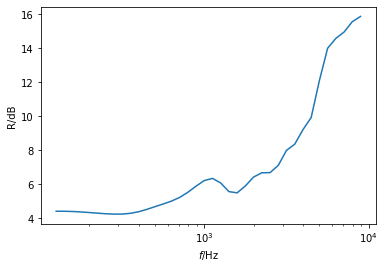

In [12]:
# define steel material
steel=ElasticMaterial(dens=7800,elas=2.1e11,poisson=0.3)
# plate and beam section
sec1=IsoPlateSec(mat=steel,thick=0.02)
sec2=RectBeamSec(mat=steel,leny=0.23,lenz=0.037)
# assemble connetion
node1=CNode()
pl1=InfPlate(sec=sec1,node=node1,theta=0,y0=0.037/2) #shift by half  
pl2=InfPlate(sec=sec1,node=node1,theta=180,y0=-0.037/2) # beam width
b1=ConnBeam(sec=sec2,node=node1,theta=0)
conn=ContLineConnect()
conn.add_member(pl1)
conn.add_member(pl2)
conn.add_member(b1)
# calculate tau for some sixth octave center frequencies
# and plot tau for bending waves from 1 to 2
fr1 = 10**np.arange(2.1,4.,0.05)    
tau1 = np.vectorize(lambda fr: conn.get_trans(fr,pl1,2,pl2)[2])(fr1)
pl.semilogx(fr1,-10*np.log10(tau1))
pl.xlabel(r'$f$/Hz')
pl.ylabel('R/dB');

* example of connection with realistic `I`-Beam (steel, plates 2 mm, flanges 4 mm, Beam 10 cm x 15 cm)
![trex3.png](trex3.png)

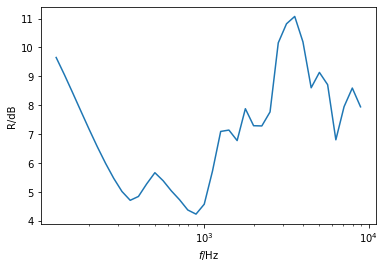

In [13]:
#material and plate section parameters
mat1=ElasticMaterial(dens=7800,elas=2e11,poisson=0.3)
sec1=IsoPlateSec(mat=mat1,thick=2e-3) #for the plates
sec2=IsoPlateSec(mat=mat1,thick=4e-3) #for the flanges
#in this case we need 6 nodes
node1=CNode(y=-0.05,z=0)
node2=CNode(y=0,z=0)
node3=CNode(y=0.05,z=0)
node4=CNode(y=-0.05,z=0.15)
node5=CNode(y=0.0,z=0.15)
node6=CNode(y=0.05,z=0.15)
#two plate members with given section and connection angle
pl01=InfPlate(sec=sec1,node=node1,theta=180)
pl02=InfPlate(sec=sec1,node=node3,theta=0)
#five strip plates for the flange
sp03=StripPlate(sec=sec2,node1=node1,node2=node2)
sp05=StripPlate(sec=sec2,node1=node2,node2=node3)
sp06=StripPlate(sec=sec2,node1=node2,node2=node5)
sp07=StripPlate(sec=sec2,node1=node4,node2=node5)
sp08=StripPlate(sec=sec2,node1=node5,node2=node6)
#connection type is continuous line
conn=ContLineConnect()
#add the members
conn.add_member(pl01)
conn.add_member(pl02)
conn.add_member(sp03)
conn.add_member(sp05)
conn.add_member(sp06)
conn.add_member(sp07)
conn.add_member(sp08)
#calculate the transmission coeff.s for all frequencies
fr1 = 10**np.arange(2.1,4.,0.05)    
for fr in fr1:
    conn.calculate(fr,100) 
    # gausspoints defaults to 50, we take 100 for improved accuracy
# calculate tau for some sixth octave center frequencies
# and plot tau for bending waves from 1 to 2
tau1 = np.vectorize(lambda fr: conn.get_trans(fr,pl01,2,pl02)[2])(fr1)
pl.semilogx(fr1,-10*np.log10(tau1))
pl.xlabel(r'$f$/Hz')
pl.ylabel('R/dB');

#### ----------------------------------------
* wave transmission over junctions is a complex phenomenon
* transmission loss due to a jump in thickness is small
* energy can also be transmitted from one wave type to another
* all junctions can be analyzed using the same generic approach
* next topic: damping

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Structure-borne sound lecture notes, 2019.

In [14]:
# this is just for custom formatting
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()